In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

# Second Degree Equations Part 4
### Cool Applications of Second Order Equations!

## Linear Regression
Let's say we recorded the following data.

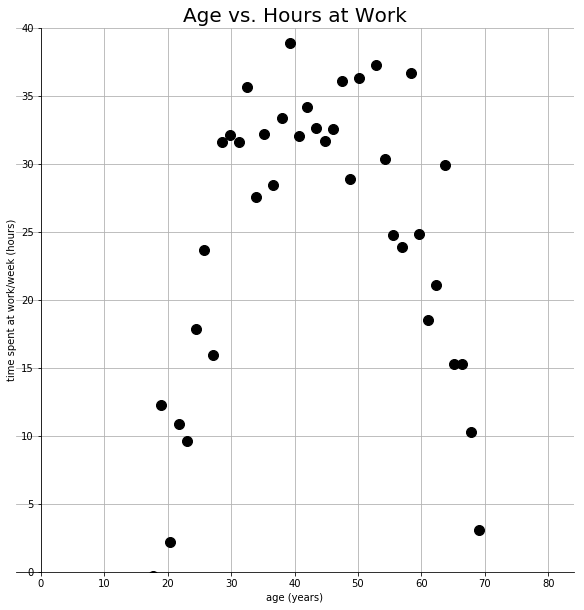

In [47]:
def plot(x, y, plot_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    ax.grid(True)
    
    ax.set_ylim([0, 40])
    #ax.set_xlim([0, 50])
    
    ax.set_xlabel("age (years)")
    ax.set_ylabel("time spent at work/week (hours)")
    
    
    if plot_fit:
        fit = np.polyfit(x, y, 2)

        fit_x = np.linspace(0, 80)
        fit_y = np.polyval(fit, fit_x)

        ax.plot(fit_x, fit_y)
    
    
x = np.linspace(0, 80, 60)
y = -0.05*x**2 + 4.4*x -60
np.random.seed(1)
noise = np.random.normal(0, 6, 60)
y = y +  noise
plot(x,y, False)

It looks like we can possibly model this with a parabola!

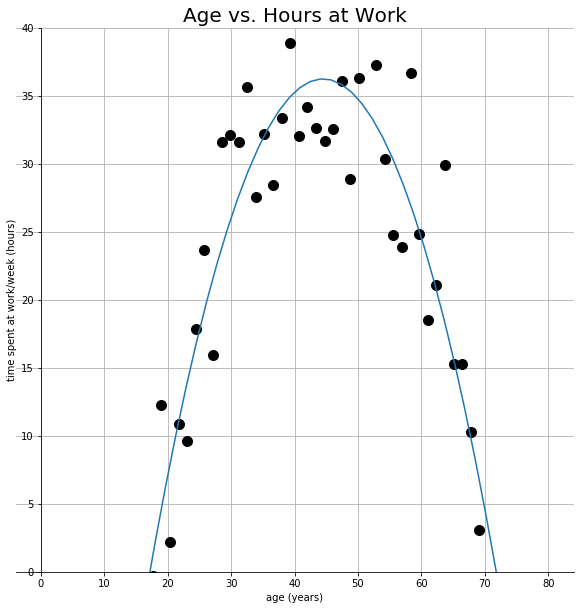

In [49]:
def plot(x, y, plot_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    ax.grid(True)
    
    ax.set_ylim([0, 40])
    #ax.set_xlim([0, 50])
    
    ax.set_xlabel("age (years)")
    ax.set_ylabel("time spent at work/week (hours)")
    
    
    if plot_fit:
        fit = np.polyfit(x, y, 2)

        fit_x = np.linspace(0, 80)
        fit_y = np.polyval(fit, fit_x)

        ax.plot(fit_x, fit_y)
    
    
x = np.linspace(0, 80, 60)
y = -0.05*x**2 + 4.4*x -60
np.random.seed(1)
noise = np.random.normal(0, 6, 60)
y = y +  noise
plot(x,y, True)

Let's learn how the computer figures out this fit!

## Error
We need to figure out a way to measure how "bad" a fit is. Let's say we have a guess to our answer and want to calculate how bad one point is.

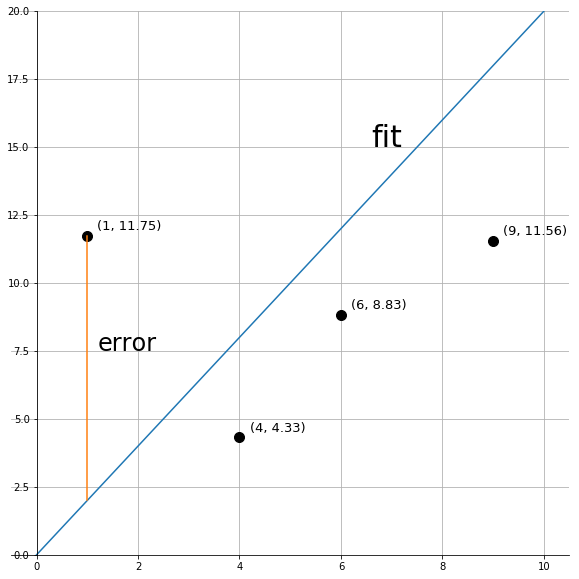

In [74]:
def plot(x, y, plot_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    #ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    
    for i in range(len(x)):
        ax.annotate("(" + str(np.round(x[i], 2)) + ", "  + str(np.round(y[i], 2))+ ")", (x[i]+0.2, y[i]+0.2), fontsize=13)
          
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.annotate("fit", (6.6, 15), fontsize="30")
    
    
    ax.grid(True)
    
    ax.set_ylim([0, 20])
    #ax.set_xlim([0, 50])
    
    #ax.set_xlabel("age (years)")
    #ax.set_ylabel("time spent at work/week (hours)")
    
    
    if plot_fit:
        #fit = np.polyfit(x, y, 2)

        fit_x = np.linspace(0, 10)
        fit_y = 2*fit_x

        ax.plot(fit_x, fit_y)
        
        # Draw error of one point
        x_error = np.array([1, 1])
        y_error = np.array([y[0], 2*x[0]])
        ax.plot(x_error, y_error)
        ax.annotate("error", (1.2, 7.5), fontsize=24)
    
    
x = np.array([1, 4, 6, 9])
y = 2*x
np.random.seed(1)
noise = np.random.normal(0, 6, 4)
y = y +  noise
plot(x,y, True)

If our point is located at $\left(x_i, y_i)\right)$ then we can calculate the error as 

$$\text{error} = \left(y_i - fit(x_i)\right)^2$$

Why is this squared?

## Error
We can calculate how bad a fit is by summing up the error of each point! 

$$\text{badness} = \sum_{\text{all points}} \left(y_i - fit(x_i)\right)^2$$

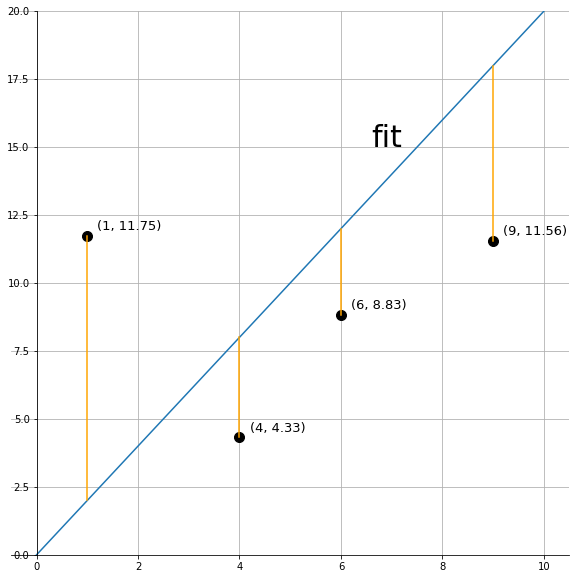

In [77]:
def plot(x, y, plot_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    #ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    
    for i in range(len(x)):
        ax.annotate("(" + str(np.round(x[i], 2)) + ", "  + str(np.round(y[i], 2))+ ")", (x[i]+0.2, y[i]+0.2), fontsize=13)
          
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.annotate("fit", (6.6, 15), fontsize="30")
    
    
    ax.grid(True)
    
    ax.set_ylim([0, 20])
    #ax.set_xlim([0, 50])
    
    #ax.set_xlabel("age (years)")
    #ax.set_ylabel("time spent at work/week (hours)")
    
    
    if plot_fit:
        #fit = np.polyfit(x, y, 2)

        fit_x = np.linspace(0, 10)
        fit_y = 2*fit_x

        ax.plot(fit_x, fit_y)
        
        for i in range(len(x)):
            # Draw error of one point
            x_error = np.array([x[i], x[i]])
            y_error = np.array([y[i], 2*x[i]])
            ax.plot(x_error, y_error, color="orange")
            #ax.annotate("error", (1.2, 7.5), fontsize=24)
    
    
x = np.array([1, 4, 6, 9])
y = 2*x
np.random.seed(1)
noise = np.random.normal(0, 6, 4)
y = y +  noise
plot(x,y, True)

Our goal is to **_find a fit that minimizes badness_**.

## Machine Learning
Given our original data set, we want our computer to figure out the values for $a$ $b$ and $c$ for a parabola that minimizes badness. $$fit = ax^2 + bx + c$$

The process of figuring out these values is callled _linear regression_, which is a topic of _machine learning_. 

Learning the exact way machines do this is a complicated topic, but just know there's many many different methods to do this.

[-0.00319276  0.41906994  0.01441503]


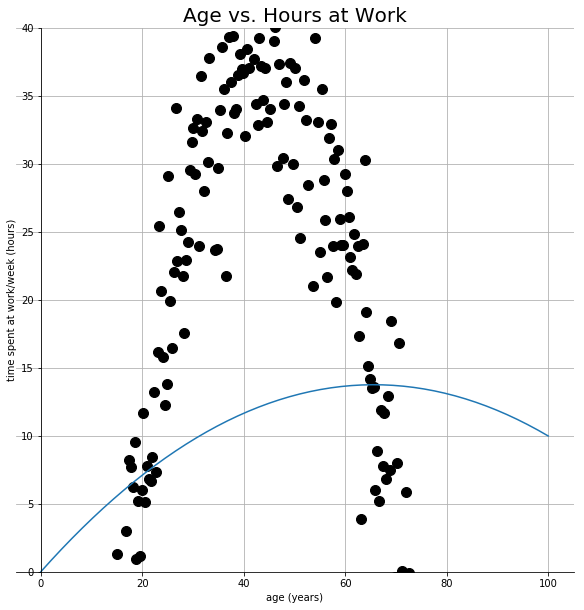

In [233]:
def plot(x, y, x_fit, y_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    ax.plot(x_fit, y_fit)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    ax.grid(True)
    
    ax.set_ylim([0, 40])
    #ax.set_xlim([0, 50])
    
    ax.set_xlabel("age (years)")
    ax.set_ylabel("time spent at work/week (hours)")
    
    
    
    

def perceptron(x, y, iters=6000, eta=0.0001, lam=0):
    x_original = x
    th = np.array([-1, 0, 0])
    #th0 = np.array([0])
    x = np.array([np.array([i**2, i, 1]).T for i in x]).T
    
    for i in range(iters):
        if i > 3:
            eta = 0.0000001
        sigma = np.array([0, 0, 0])
        for j in range(x.shape[1]):
            sigma = sigma + (np.dot(th, x[:, j]) - y[j])*x[:, j]
            
        dth = 2/x.shape[1]*sigma + 2*lam*th
        th = th - eta*dth
        #print(th)
        #th0 = th0 - eta*2/x.shape[1]*sigma0
        #print(th0)
        
    print(th)
    #print(th0)
    x_fit = np.linspace(0, 100)
    x_fit_new = np.array([np.array([i**2, i, 1]).T for i in x_fit]).T
    y_fit = np.dot(th, x_fit_new)
    plot(x_original,y, x_fit, y_fit)
    
        
    
x = np.linspace(10, 80, 200)
y = -0.05*x**2 + 4.4*x -60
np.random.seed(1)
noise = np.random.normal(0, 6, 200)
y = y +  noise
perceptron(x, y)

## Projectile Motion

When things are thrown into the air, they follow a parabolic arc!

![](https://i.imgur.com/IoYK8sx.png)

$$y = -\frac{1}{2}gt^2 + v_0t + y_0$$ where $$g = \text{acceleration due to gravity}$$ $$v_0 = \text{initial velocity in y-direction}$$ $$y_0 = \text{initial y position}$$

## Paraboloid


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Paraboloid_of_Revolution.svg/640px-Paraboloid_of_Revolution.svg.png?1548008701778" style="width: 400px"/>
